In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn import metrics

In [2]:
inputs_train = pd.read_csv('inputs_train.csv', index_col=0)
targets_train = pd.read_csv('targets_train.csv', index_col=0)
inputs_test = pd.read_csv('inputs_test.csv', index_col=0)
targets_test = pd.read_csv('targets_test.csv', index_col=0)

In [3]:
pd.options.display.max_columns = None

In [4]:
inputs_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership:MORTGAGE,person_home_ownership:OTHER,person_home_ownership:OWN,person_home_ownership:RENT,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_grade:G,cb_person_default_on_file:N,cb_person_default_on_file:Y,loan_intent:DEBTCONSOLIDATION,loan_intent:EDUCATION,loan_intent:HOMEIMPROVEMENT,loan_intent:MEDICAL,loan_intent:PERSONAL,loan_intent:VENTURE,loan_percent_income_factor,person_home_ownership:OTHER_RENT,person_age:<=22,person_age:23-28,person_age:29-33,person_age:34-37,person_age:>=38,person_income_factor,person_income:<=20K,person_income:20K-34K,person_income:34K-52.5K,person_income:52.5K-66.5K,person_income:66.5K-75.7K,person_income:>75.7K,person_emp_length:<=2,person_emp_length:3-7,person_emp_length:8-10,person_emp_length:>10,loan_amnt_factor,loan_amnt:<=3260,loan_amnt:3260-8090,loan_amnt:8090-12230,loan_amnt:12230-18440,loan_amnt:>18440,loan_int_rate_factor,loan_int_rate:<=6.488,loan_int_rate:6.488-9.692,loan_int_rate:9.692-10.76,loan_int_rate:10.76-13.964,loan_int_rate:13.964-15.388,loan_int_rate:15.388-17.88,loan_int_rate:>17.88,loan_percent_income:<=13.3pct,loan_percent_income:13.3-16.6pct,loan_percent_income:16.6-29.9pct,loan_percent_income:29.9-31.5pct,loan_percent_income:>31.5pct
24386,31,50000,RENT,1.0,MEDICAL,B,10000,12.69,0,0.20,N,8,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,"(0.199, 0.216]",1,0,0,1,0,0,"(44715.68, 85431.36]",1,1,1,0,0,0,1,0,0,0,"(9470.0, 10160.0]",0,0,1,0,0,"(12.54, 12.896]",0,0,0,1,0,0,0,0,0,1,0,0
28394,27,80000,MORTGAGE,1.0,EDUCATION,B,20000,11.36,0,0.25,N,8,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,"(0.249, 0.266]",0,0,1,0,0,0,"(44715.68, 85431.36]",1,1,1,1,1,1,1,0,0,0,"(19820.0, 20510.0]",0,0,0,0,1,"(11.116, 11.472]",0,0,0,1,0,0,0,0,0,1,0,0
1342,25,28000,RENT,6.0,DEBTCONSOLIDATION,A,1000,7.51,0,0.04,N,3,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,"(0.0332, 0.0498]",1,0,1,0,0,0,"(1964.216, 44715.68]",1,1,0,0,0,0,0,1,0,0,"(465.5, 1190.0]",1,0,0,0,0,"(7.2, 7.556]",0,1,0,0,0,0,0,1,0,0,0,0
7051,21,51000,MORTGAGE,5.0,PERSONAL,A,6000,7.88,0,0.12,N,2,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,"(0.116, 0.133]",0,1,0,0,0,0,"(44715.68, 85431.36]",1,1,1,0,0,0,0,1,0,0,"(5330.0, 6020.0]",0,1,0,0,0,"(7.556, 7.912]",0,1,0,0,0,0,0,1,0,0,0,0
8229,26,56004,MORTGAGE,10.0,EDUCATION,C,20000,13.57,0,0.36,Y,4,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,"(0.349, 0.365]",0,0,1,0,0,0,"(44715.68, 85431.36]",1,1,1,1,0,0,0,0,1,0,"(19820.0, 20510.0]",0,0,0,0,1,"(13.252, 13.608]",0,0,0,1,0,0,0,0,0,0,0,1


In [5]:
inputs_train.shape

(26060, 68)

In [6]:
targets_train.shape

(26060, 1)

In [7]:
inputs_test.shape

(6516, 68)

In [8]:
targets_test.shape

(6516, 1)

In [9]:
targets_train.head()

,good_bad
24386,1
28394,1
1342,1
7051,1
8229,1


In [10]:
inputs_train_ref = inputs_train.loc[:,[
    'person_home_ownership:OWN', 
    'person_home_ownership:MORTGAGE', 
    'person_home_ownership:OTHER_RENT',
    'cb_person_default_on_file:Y', 
    'cb_person_default_on_file:N',
    'loan_grade:A',  
    'loan_grade:B',
    'loan_grade:C', 
    'loan_grade:D', 
    'loan_grade:E', 
    'loan_grade:F', 
    'loan_grade:G',
    'loan_intent:DEBTCONSOLIDATION',
    'loan_intent:EDUCATION', 
    'loan_intent:HOMEIMPROVEMENT',
    'loan_intent:MEDICAL',
    'loan_intent:PERSONAL',
    'loan_intent:VENTURE',
    'person_age:<=22', 
    'person_age:23-28', 
    'person_age:29-33', 
    'person_age:34-37',  
    'person_age:>=38',
    'person_income:<=20K', 
    'person_income:20K-34K',  
    'person_income:34K-52.5K', 
    'person_income:52.5K-66.5K', 
    'person_income:66.5K-75.7K',  
    'person_income:>75.7K',
    'person_emp_length:<=2', 
    'person_emp_length:3-7', 
    'person_emp_length:8-10', 
    'person_emp_length:>10',
    'loan_amnt:<=3260', 
    'loan_amnt:3260-8090', 
    'loan_amnt:8090-12230', 
    'loan_amnt:12230-18440',  
    'loan_amnt:>18440',
    'loan_int_rate:<=6.488', 
    'loan_int_rate:6.488-9.692', 
    'loan_int_rate:9.692-10.76', 
    'loan_int_rate:10.76-13.964', 
    'loan_int_rate:13.964-15.388', 
    'loan_int_rate:15.388-17.88', 
    'loan_int_rate:>17.88',
    'loan_percent_income:<=13.3pct', 
    'loan_percent_income:13.3-16.6pct', 
    'loan_percent_income:16.6-29.9pct', 
    'loan_percent_income:29.9-31.5pct', 
    'loan_percent_income:>31.5pct',
]]

In [11]:
ref_categories = [
    'person_home_ownership:OTHER_RENT',
    'cb_person_default_on_file:Y',
    'loan_grade:G',
    'loan_intent:DEBTCONSOLIDATION',
    'person_age:<=22',
    'person_income:<=20K',
    'person_emp_length:<=2',
    'loan_amnt:>18440',
    'loan_int_rate:>17.88',
    'loan_percent_income:>31.5pct'
]

In [12]:
X_train = inputs_train_ref.drop(ref_categories, axis=1)

In [13]:
X_train.shape

(26060, 40)

In [14]:
y_train = targets_train.values.ravel()

In [15]:
y_train.shape

(26060,)

selected dummy variables:

'person_home_ownership:OWN', 
'person_home_ownership:MORTGAGE', 
'person_home_ownership:OTHER_RENT',
'cb_person_default_on_file:Y', 
'cb_person_default_on_file:N',
'loan_grade:A',  
'loan_grade:B',
'loan_grade:C', 
'loan_grade:D', 
'loan_grade:E', 
'loan_grade:F', 
'loan_grade:G',
'loan_intent:DEBTCONSOLIDATION',
'loan_intent:EDUCATION', 
'loan_intent:HOMEIMPROVEMENT',
'loan_intent:MEDICAL',
'loan_intent:PERSONAL',
'loan_intent:VENTURE',
'person_age:<=22', 
'person_age:23-28', 
'person_age:29-33', 
'person_age:34-37',  
'person_age:>=38',
'person_income:<=20K', 
'person_income:20K-34K',  
'person_income:34K-52.5K', 
'person_income:52.5K-66.5K', 
'person_income:66.5K-75.7K',  
'person_income:>75.7K',
'person_emp_length:<=2', 
'person_emp_length:3-7', 
'person_emp_length:8-10', 
'person_emp_length:>10',
'loan_amnt:<=3260', 
'loan_amnt:3260-8090', 
'loan_amnt:8090-12230', 
'loan_amnt:12230-18440',  
'loan_amnt:>18440',
'loan_int_rate:<=6.488', 
'loan_int_rate:6.488-9.692', 
'loan_int_rate:9.692-10.76', 
'loan_int_rate:10.76-13.964', 
'loan_int_rate:13.964-15.388', 
'loan_int_rate:15.388-17.88', 
'loan_int_rate:>17.88',
'loan_percent_income:<=13.3pct', 
'loan_percent_income:13.3-16.6pct', 
'loan_percent_income:16.6-29.9pct', 
'loan_percent_income:29.9-31.5pct', 
'loan_percent_income:>31.5pct',

selected reference categories:

'person_home_ownership:OTHER_RENT',
'loan_grade:G',
'loan_intent:DEBTCONSOLIDATION',
'person_age:<=22',
'person_income:<=20K',
'person_emp_length:<=2',
'loan_amnt:>18440',
'loan_int_rate:>17.88',
'loan_percent_income:>31.5pct'

# fit the model

In [16]:
reg = LogisticRegression(max_iter=1000)

In [17]:
reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [18]:
reg.intercept_

array([-8.84694462])

In [19]:
feature_name = X_train.columns.values

In [20]:
summary_table = pd.DataFrame(columns=['Feature Name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table.head()

,Feature Name,Coefficients
0,Intercept,-8.846945
1,person_home_ownership:OWN,3.006138
2,person_home_ownership:MORTGAGE,0.856927
3,cb_person_default_on_file:N,-0.004850
4,loan_grade:A,3.676297


In [21]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    def __init__(self, *args, **kwargs):
        self.model = linear_model.LogisticRegression(*args, **kwargs)
        
    def fit(self, X, y):
        self.model.fit(X, y)
        demon = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        demon = np.tile(demon, (X.shape[1],1)).T
        F_ij = np.dot((X / demon).T, X) + 0.0001
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [22]:
reg = LogisticRegression_with_p_values(max_iter=1000)

In [23]:
reg.fit(X_train, y_train)

In [24]:
summary_table = pd.DataFrame(columns=['Feature Name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table.head()

,Feature Name,Coefficients
0,Intercept,-8.846945
1,person_home_ownership:OWN,3.006138
2,person_home_ownership:MORTGAGE,0.856927
3,cb_person_default_on_file:N,-0.004850
4,loan_grade:A,3.676297


In [25]:
p_values = reg.p_values

In [26]:
p_values = np.append(np.nan, np.array(p_values))

In [27]:
summary_table['p_values'] = p_values

In [28]:
summary_table

,Feature Name,Coefficients,p_values
0,Intercept,-8.846945,NaN
1,person_home_ownership:OWN,3.006138,3.466371e-142
2,person_home_ownership:MORTGAGE,0.856927,1.200402e-73
3,cb_person_default_on_file:N,-0.004850,9.326088e-01
4,loan_grade:A,3.676297,7.768597e-46
5,loan_grade:B,3.458481,1.637343e-47
6,loan_grade:C,3.132311,8.011434e-42
7,loan_grade:D,1.031875,5.858820e-06
8,loan_grade:E,0.762681,3.774326e-04
9,loan_grade:F,0.524107,3.171796e-02


Conventionally, if a p-value is lower than 0.05, we conclude that the coefficient of a variable is statistically significant.

In [29]:
# keep 'person_home_ownership', 'loan_grade', 'loan_intent', 'person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',

# discard 'cb_person_default_on_file', 

inputs_train_ref = inputs_train.loc[:,[
    'person_home_ownership:OWN', 
    'person_home_ownership:MORTGAGE', 
    'person_home_ownership:OTHER_RENT',
    'loan_grade:A',  
    'loan_grade:B',
    'loan_grade:C', 
    'loan_grade:D', 
    'loan_grade:E', 
    'loan_grade:F', 
    'loan_grade:G',
    'loan_intent:DEBTCONSOLIDATION',
    'loan_intent:EDUCATION', 
    'loan_intent:HOMEIMPROVEMENT',
    'loan_intent:MEDICAL',
    'loan_intent:PERSONAL',
    'loan_intent:VENTURE',
    'person_age:<=22', 
    'person_age:23-28', 
    'person_age:29-33', 
    'person_age:34-37',  
    'person_age:>=38',
    'person_income:<=20K', 
    'person_income:20K-34K',  
    'person_income:34K-52.5K', 
    'person_income:52.5K-66.5K', 
    'person_income:66.5K-75.7K',  
    'person_income:>75.7K',
    'person_emp_length:<=2', 
    'person_emp_length:3-7', 
    'person_emp_length:8-10', 
    'person_emp_length:>10',
    'loan_amnt:<=3260', 
    'loan_amnt:3260-8090', 
    'loan_amnt:8090-12230', 
    'loan_amnt:12230-18440',  
    'loan_amnt:>18440',
    'loan_int_rate:<=6.488', 
    'loan_int_rate:6.488-9.692', 
    'loan_int_rate:9.692-10.76', 
    'loan_int_rate:10.76-13.964', 
    'loan_int_rate:13.964-15.388', 
    'loan_int_rate:15.388-17.88', 
    'loan_int_rate:>17.88',
    'loan_percent_income:<=13.3pct', 
    'loan_percent_income:13.3-16.6pct', 
    'loan_percent_income:16.6-29.9pct', 
    'loan_percent_income:29.9-31.5pct', 
    'loan_percent_income:>31.5pct',
]]

In [30]:
ref_categories = [
    'person_home_ownership:OTHER_RENT',
    'loan_grade:G',
    'loan_intent:DEBTCONSOLIDATION',
    'person_age:<=22',
    'person_income:<=20K',
    'person_emp_length:<=2',
    'loan_amnt:>18440',
    'loan_int_rate:>17.88',
    'loan_percent_income:>31.5pct'
]

In [31]:
X_train = inputs_train_ref.drop(ref_categories, axis=1)

In [32]:
X_train.shape

(26060, 39)

In [36]:
reg2 = LogisticRegression_with_p_values(max_iter=1000)

In [37]:
reg2.fit(X_train, y_train)

In [38]:
feature_name = X_train.columns.values

In [39]:
feature_name.shape

(39,)

In [40]:
summary_table = pd.DataFrame(columns=['Feature Name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table.head()

,Feature Name,Coefficients
0,Intercept,-8.852814
1,person_home_ownership:OWN,3.006490
2,person_home_ownership:MORTGAGE,0.856950
3,loan_grade:A,3.678657
4,loan_grade:B,3.460546


In [41]:
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature Name,Coefficients,p_values
0,Intercept,-8.852814,NaN
1,person_home_ownership:OWN,3.006490,3.354750e-142
2,person_home_ownership:MORTGAGE,0.856950,1.195148e-73
3,loan_grade:A,3.678657,7.251169e-48
4,loan_grade:B,3.460546,5.225900e-50
5,loan_grade:C,3.136632,2.087951e-42
6,loan_grade:D,1.036228,4.757157e-06
7,loan_grade:E,0.766886,3.197935e-04
8,loan_grade:F,0.526919,2.988458e-02
9,loan_intent:EDUCATION,0.974232,1.490510e-47


# PD Model Validation

In [42]:
inputs_test_ref = inputs_test.loc[:,[
   'person_home_ownership:OWN', 
    'person_home_ownership:MORTGAGE', 
    'person_home_ownership:OTHER_RENT',
    'loan_grade:A',  
    'loan_grade:B',
    'loan_grade:C', 
    'loan_grade:D', 
    'loan_grade:E', 
    'loan_grade:F', 
    'loan_grade:G',
    'loan_intent:DEBTCONSOLIDATION',
    'loan_intent:EDUCATION', 
    'loan_intent:HOMEIMPROVEMENT',
    'loan_intent:MEDICAL',
    'loan_intent:PERSONAL',
    'loan_intent:VENTURE',
    'person_age:<=22', 
    'person_age:23-28', 
    'person_age:29-33', 
    'person_age:34-37',  
    'person_age:>=38',
    'person_income:<=20K', 
    'person_income:20K-34K',  
    'person_income:34K-52.5K', 
    'person_income:52.5K-66.5K', 
    'person_income:66.5K-75.7K',  
    'person_income:>75.7K',
    'person_emp_length:<=2', 
    'person_emp_length:3-7', 
    'person_emp_length:8-10', 
    'person_emp_length:>10',
    'loan_amnt:<=3260', 
    'loan_amnt:3260-8090', 
    'loan_amnt:8090-12230', 
    'loan_amnt:12230-18440',  
    'loan_amnt:>18440',
    'loan_int_rate:<=6.488', 
    'loan_int_rate:6.488-9.692', 
    'loan_int_rate:9.692-10.76', 
    'loan_int_rate:10.76-13.964', 
    'loan_int_rate:13.964-15.388', 
    'loan_int_rate:15.388-17.88', 
    'loan_int_rate:>17.88',
    'loan_percent_income:<=13.3pct', 
    'loan_percent_income:13.3-16.6pct', 
    'loan_percent_income:16.6-29.9pct', 
    'loan_percent_income:29.9-31.5pct', 
    'loan_percent_income:>31.5pct'
]]

In [43]:
X_test = inputs_test_ref.drop(ref_categories, axis=1)

In [44]:
y_test = targets_test.values.ravel()

In [45]:
# default cut of of probabily: 50%
y_hat = reg2.model.predict(X_test)

In [46]:
y_hat_proba = reg2.model.predict_proba(X_test)

In [47]:
y_hat_proba

array([[0.03178404, 0.96821596],
       [0.05675652, 0.94324348],
       [0.77301906, 0.22698094],
       ...,
       [0.1330492 , 0.8669508 ],
       [0.01363874, 0.98636126],
       [0.01481529, 0.98518471]])

In [48]:
y_hat_proba[: ][:,1]

array([0.96821596, 0.94324348, 0.22698094, ..., 0.8669508 , 0.98636126,
       0.98518471])

In [49]:
y_hat_proba = y_hat_proba[: ][:,1]

In [50]:
targets_test_temp = targets_test

In [51]:
targets_test_temp.reset_index(drop=True, inplace=True)

In [52]:
df_actual_predicted_probs = pd.concat([targets_test_temp, pd.DataFrame(y_hat_proba)], axis=1)

In [53]:
df_actual_predicted_probs.shape

(6516, 2)

In [54]:
df_actual_predicted_probs.columns = ['target_test', 'y_hat_proba']

In [55]:
df_actual_predicted_probs.index = targets_test.index

In [56]:
df_actual_predicted_probs.head()

,target_test,y_hat_proba
0,1,0.968216
1,1,0.943243
2,0,0.226981
3,0,0.170636
4,1,0.898556


In [57]:
# tr - cutoff threshold
tr = 0.5
df_actual_predicted_probs['y_hat_cut'] = np.where(df_actual_predicted_probs['y_hat_proba'] > tr, 1, 0)

In [58]:
df_actual_predicted_probs.head()

,target_test,y_hat_proba,y_hat_cut
0,1,0.968216,1
1,1,0.943243,1
2,0,0.226981,0
3,0,0.170636,0
4,1,0.898556,1


In [59]:
# confusion matrix
pd.crosstab(df_actual_predicted_probs['target_test'], df_actual_predicted_probs['y_hat_cut'], rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,913,507
1,249,4847


In [60]:
# confusion matrix percentage
pd.crosstab(df_actual_predicted_probs['target_test'], df_actual_predicted_probs['y_hat_cut'], rownames=['Actual'], colnames=['Predicted']) /df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.140117,0.077808
1,0.038214,0.743861


In [61]:
# accuracy
(pd.crosstab(df_actual_predicted_probs['target_test'], df_actual_predicted_probs['y_hat_cut'], rownames=['Actual'], colnames=['Predicted']) /df_actual_predicted_probs.shape[0]).iloc[0,0] + (pd.crosstab(df_actual_predicted_probs['target_test'], df_actual_predicted_probs['y_hat_cut'], rownames=['Actual'], colnames=['Predicted']) /df_actual_predicted_probs.shape[0]).iloc[1,1]

0.8839779005524862

## ROC Curve -- Receiver Operating Characteristic Curve

In [62]:
from sklearn.metrics import roc_auc_score, roc_curve

In [63]:
roc_curve(df_actual_predicted_probs['target_test'], df_actual_predicted_probs['y_hat_proba'])

(array([0.        , 0.        , 0.        , ..., 0.98309859, 0.98450704,
        1.        ]),
 array([0.00000000e+00, 1.96232339e-04, 1.76609105e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99929404e+00, 9.99294037e-01, 9.98964021e-01, ...,
        8.93478112e-03, 8.89591268e-03, 5.60936478e-04]))

In [64]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['target_test'], df_actual_predicted_probs['y_hat_proba'])

Text(0.5, 1.0, 'ROC Curve')

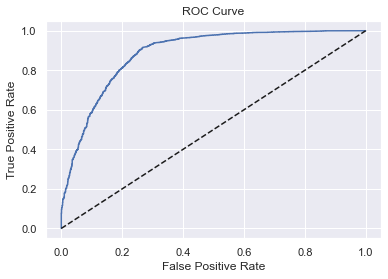

In [65]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color= 'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

## AUC, -- Area Under the Curve, is the area under the blue curve

In [66]:
AUROC = roc_auc_score(df_actual_predicted_probs['target_test'], df_actual_predicted_probs['y_hat_proba'])
AUROC

0.8858239408981359

# Try XGB later and compare the AUC with logistic

# Model Performance Analysis
## 1. Gini Coefficient
## 2. Kolmogorov-Smirnov Coefficient

In [67]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_proba')

In [68]:
df_actual_predicted_probs.head(10)

,target_test,y_hat_proba,y_hat_cut
1764,0,0.000561,0
5358,0,0.000642,0
5547,0,0.000889,0
2198,0,0.000983,0
1196,0,0.001049,0
857,0,0.001885,0
399,0,0.002369,0
2598,0,0.005735,0
1533,0,0.006114,0
2387,0,0.006226,0


In [69]:
df_actual_predicted_probs.tail(10)

,target_test,y_hat_proba,y_hat_cut
2506,1,0.998959,1
4152,1,0.998964,1
4028,1,0.998964,1
3745,1,0.999024,1
6475,1,0.999029,1
4395,1,0.999038,1
1135,1,0.999093,1
5230,1,0.999144,1
173,1,0.999286,1
4495,1,0.999294,1


In [70]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [71]:
df_actual_predicted_probs.head()

,index,target_test,y_hat_proba,y_hat_cut
0,1764,0,0.000561,0
1,5358,0,0.000642,0
2,5547,0,0.000889,0
3,2198,0,0.000983,0
4,1196,0,0.001049,0


In [72]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['target_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['Cumulative N Good']

In [73]:
df_actual_predicted_probs.head(10)

,index,target_test,y_hat_proba,y_hat_cut,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,1764,0,0.000561,0,1,0,1
1,5358,0,0.000642,0,2,0,2
2,5547,0,0.000889,0,3,0,3
3,2198,0,0.000983,0,4,0,4
4,1196,0,0.001049,0,5,0,5
5,857,0,0.001885,0,6,0,6
6,399,0,0.002369,0,7,0,7
7,2598,0,0.005735,0,8,0,8
8,1533,0,0.006114,0,9,0,9
9,2387,0,0.006226,0,10,0,10


In [74]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])

df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['target_test'].sum()

df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['target_test'].sum())

In [75]:
df_actual_predicted_probs.head()

,index,target_test,y_hat_proba,y_hat_cut,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,1764,0,0.000561,0,1,0,1,0.000153,0.0,0.000704
1,5358,0,0.000642,0,2,0,2,0.000307,0.0,0.001408
2,5547,0,0.000889,0,3,0,3,0.000460,0.0,0.002113
3,2198,0,0.000983,0,4,0,4,0.000614,0.0,0.002817
4,1196,0,0.001049,0,5,0,5,0.000767,0.0,0.003521


In [76]:
df_actual_predicted_probs.tail()

,index,target_test,y_hat_proba,y_hat_cut,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
6511,4395,1,0.999038,1,6512,5092,1420,0.999386,0.999215,1.0
6512,1135,1,0.999093,1,6513,5093,1420,0.999540,0.999411,1.0
6513,5230,1,0.999144,1,6514,5094,1420,0.999693,0.999608,1.0
6514,173,1,0.999286,1,6515,5095,1420,0.999847,0.999804,1.0
6515,4495,1,0.999294,1,6516,5096,1420,1.000000,1.000000,1.0


## Gini Coefficient plot and calculation

Text(0.5, 1.0, 'Gini Coefficient')

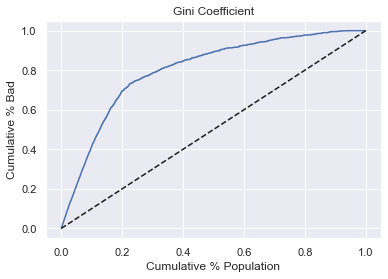

In [77]:
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini Coefficient')

## $\text{Gini} = \text{AUROC} * 2 - 1$

## $\text{AUROC} = \frac{\text{Gini+1}}{2}$

In [78]:
Gini = AUROC * 2 -1
Gini

0.7716478817962718

## Kolmogorov-Smirnov Coefficient plot and calculation

Text(0.5, 1.0, 'Kolmogorov-Smirnov Coefficient')

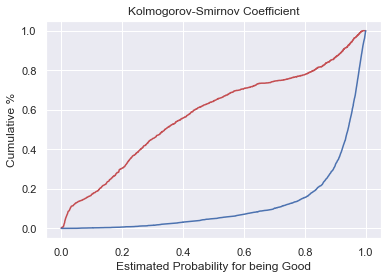

In [79]:
plt.plot(df_actual_predicted_probs['y_hat_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted_probs['y_hat_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov Coefficient')

In [80]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.6478989320538616

# Applying the PD Model

In [81]:
y_hat_proba

array([0.96821596, 0.94324348, 0.22698094, ..., 0.8669508 , 0.98636126,
       0.98518471])

## Turn PD model into Scorecard

In [82]:
summary_table

,Feature Name,Coefficients,p_values
0,Intercept,-8.852814,NaN
1,person_home_ownership:OWN,3.006490,3.354750e-142
2,person_home_ownership:MORTGAGE,0.856950,1.195148e-73
3,loan_grade:A,3.678657,7.251169e-48
4,loan_grade:B,3.460546,5.225900e-50
5,loan_grade:C,3.136632,2.087951e-42
6,loan_grade:D,1.036228,4.757157e-06
7,loan_grade:E,0.766886,3.197935e-04
8,loan_grade:F,0.526919,2.988458e-02
9,loan_intent:EDUCATION,0.974232,1.490510e-47


In [83]:
ref_categories

['person_home_ownership:OTHER_RENT',
 'loan_grade:G',
 'loan_intent:DEBTCONSOLIDATION',
 'person_age:<=22',
 'person_income:<=20K',
 'person_emp_length:<=2',
 'loan_amnt:>18440',
 'loan_int_rate:>17.88',
 'loan_percent_income:>31.5pct']

In [85]:
df_ref = pd.DataFrame(ref_categories, columns=['Feature Name'])
df_ref['Coefficients'] = 0
df_ref['p_values'] = np.nan
df_ref

,Feature Name,Coefficients,p_values
0,person_home_ownership:OTHER_RENT,0,NaN
1,loan_grade:G,0,NaN
2,loan_intent:DEBTCONSOLIDATION,0,NaN
3,person_age:<=22,0,NaN
4,person_income:<=20K,0,NaN
5,person_emp_length:<=2,0,NaN
6,loan_amnt:>18440,0,NaN
7,loan_int_rate:>17.88,0,NaN
8,loan_percent_income:>31.5pct,0,NaN


In [86]:
df_scorecard = pd.concat([summary_table, df_ref])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Feature Name,Coefficients,p_values
0,0,Intercept,-8.852814,NaN
1,1,person_home_ownership:OWN,3.006490,3.354750e-142
2,2,person_home_ownership:MORTGAGE,0.856950,1.195148e-73
3,3,loan_grade:A,3.678657,7.251169e-48
4,4,loan_grade:B,3.460546,5.225900e-50
5,5,loan_grade:C,3.136632,2.087951e-42
6,6,loan_grade:D,1.036228,4.757157e-06
7,7,loan_grade:E,0.766886,3.197935e-04
8,8,loan_grade:F,0.526919,2.988458e-02
9,9,loan_intent:EDUCATION,0.974232,1.490510e-47


In [87]:
df_scorecard['Original Feature Name'] = df_scorecard['Feature Name'].str.split(':').str[0]

In [88]:
df_scorecard

,index,Feature Name,Coefficients,p_values,Original Feature Name
0,0,Intercept,-8.852814,NaN,Intercept
1,1,person_home_ownership:OWN,3.006490,3.354750e-142,person_home_ownership
2,2,person_home_ownership:MORTGAGE,0.856950,1.195148e-73,person_home_ownership
3,3,loan_grade:A,3.678657,7.251169e-48,loan_grade
4,4,loan_grade:B,3.460546,5.225900e-50,loan_grade
5,5,loan_grade:C,3.136632,2.087951e-42,loan_grade
6,6,loan_grade:D,1.036228,4.757157e-06,loan_grade
7,7,loan_grade:E,0.766886,3.197935e-04,loan_grade
8,8,loan_grade:F,0.526919,2.988458e-02,loan_grade
9,9,loan_intent:EDUCATION,0.974232,1.490510e-47,loan_intent


### Set min score = 300, max score = 850

In [89]:
min_score = 300
max_score = 850

In [90]:
df_scorecard.groupby('Original Feature Name')['Coefficients'].min()

Original Feature Name
Intercept               -8.852814
loan_amnt                0.000000
loan_grade               0.000000
loan_int_rate            0.000000
loan_intent             -0.007089
loan_percent_income      0.000000
person_age               0.000000
person_emp_length        0.000000
person_home_ownership    0.000000
person_income           -0.009720
Name: Coefficients, dtype: float64

In [91]:
min_sum_coef = df_scorecard.groupby('Original Feature Name')['Coefficients'].min().sum()
min_sum_coef

-8.869623315723834

In [92]:
df_scorecard.groupby('Original Feature Name')['Coefficients'].max()

Original Feature Name
Intercept               -8.852814
loan_amnt                0.123124
loan_grade               3.678657
loan_int_rate            1.027340
loan_intent              1.213655
loan_percent_income      3.112966
person_age               0.153491
person_emp_length        0.325432
person_home_ownership    3.006490
person_income            2.513081
Name: Coefficients, dtype: float64

In [93]:
max_sum_coef = df_scorecard.groupby('Original Feature Name')['Coefficients'].max().sum()
max_sum_coef

6.301420830654147

In [94]:
df_scorecard['Score-Calculation'] = df_scorecard['Coefficients'] * (max_score-min_score)/(max_sum_coef-min_sum_coef)

In [95]:
df_scorecard['Score-Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score

C:\Users\YizhiZhang\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
df_scorecard

,index,Feature Name,Coefficients,p_values,Original Feature Name,Score-Calculation
0,0,Intercept,-8.852814,NaN,Intercept,300.609385
1,1,person_home_ownership:OWN,3.006490,3.354750e-142,person_home_ownership,108.995084
2,2,person_home_ownership:MORTGAGE,0.856950,1.195148e-73,person_home_ownership,31.067259
3,3,loan_grade:A,3.678657,7.251169e-48,loan_grade,133.363357
4,4,loan_grade:B,3.460546,5.225900e-50,loan_grade,125.456121
5,5,loan_grade:C,3.136632,2.087951e-42,loan_grade,113.713181
6,6,loan_grade:D,1.036228,4.757157e-06,loan_grade,37.566651
7,7,loan_grade:E,0.766886,3.197935e-04,loan_grade,27.802129
8,8,loan_grade:F,0.526919,2.988458e-02,loan_grade,19.102534
9,9,loan_intent:EDUCATION,0.974232,1.490510e-47,loan_intent,35.319087


In [97]:
df_scorecard['Score-Preliminary'] = df_scorecard['Score-Calculation'].round()
df_scorecard

,index,Feature Name,Coefficients,p_values,Original Feature Name,Score-Calculation,Score-Preliminary
0,0,Intercept,-8.852814,NaN,Intercept,300.609385,301.0
1,1,person_home_ownership:OWN,3.006490,3.354750e-142,person_home_ownership,108.995084,109.0
2,2,person_home_ownership:MORTGAGE,0.856950,1.195148e-73,person_home_ownership,31.067259,31.0
3,3,loan_grade:A,3.678657,7.251169e-48,loan_grade,133.363357,133.0
4,4,loan_grade:B,3.460546,5.225900e-50,loan_grade,125.456121,125.0
5,5,loan_grade:C,3.136632,2.087951e-42,loan_grade,113.713181,114.0
6,6,loan_grade:D,1.036228,4.757157e-06,loan_grade,37.566651,38.0
7,7,loan_grade:E,0.766886,3.197935e-04,loan_grade,27.802129,28.0
8,8,loan_grade:F,0.526919,2.988458e-02,loan_grade,19.102534,19.0
9,9,loan_intent:EDUCATION,0.974232,1.490510e-47,loan_intent,35.319087,35.0


In [98]:
min_sum_score_pre = df_scorecard.groupby('Original Feature Name')['Score-Preliminary'].min().sum()
min_sum_score_pre

301.0

In [99]:
max_sum_score_pre = df_scorecard.groupby('Original Feature Name')['Score-Preliminary'].max().sum()
max_sum_score_pre

850.0

In [100]:
df_scorecard['Difference'] = df_scorecard['Score-Preliminary'] - df_scorecard['Score-Calculation']
df_scorecard

,index,Feature Name,Coefficients,p_values,Original Feature Name,Score-Calculation,Score-Preliminary,Difference
0,0,Intercept,-8.852814,NaN,Intercept,300.609385,301.0,0.390615
1,1,person_home_ownership:OWN,3.006490,3.354750e-142,person_home_ownership,108.995084,109.0,0.004916
2,2,person_home_ownership:MORTGAGE,0.856950,1.195148e-73,person_home_ownership,31.067259,31.0,-0.067259
3,3,loan_grade:A,3.678657,7.251169e-48,loan_grade,133.363357,133.0,-0.363357
4,4,loan_grade:B,3.460546,5.225900e-50,loan_grade,125.456121,125.0,-0.456121
5,5,loan_grade:C,3.136632,2.087951e-42,loan_grade,113.713181,114.0,0.286819
6,6,loan_grade:D,1.036228,4.757157e-06,loan_grade,37.566651,38.0,0.433349
7,7,loan_grade:E,0.766886,3.197935e-04,loan_grade,27.802129,28.0,0.197871
8,8,loan_grade:F,0.526919,2.988458e-02,loan_grade,19.102534,19.0,-0.102534
9,9,loan_intent:EDUCATION,0.974232,1.490510e-47,loan_intent,35.319087,35.0,-0.319087


### If we need to add one, find the largest negetive difference. Vice versa.

In [120]:
df_scorecard.groupby('Original Feature Name')['Score-Final'].max()

Original Feature Name
Intercept                300.0
loan_amnt                  4.0
loan_grade               133.0
loan_int_rate             37.0
loan_intent               44.0
loan_percent_income      113.0
person_age                 6.0
person_emp_length         12.0
person_home_ownership    109.0
person_income             91.0
Name: Score-Final, dtype: float64

In [121]:
df_scorecard['Difference'].max()
# 'loan_amnt:3260-8090', row index 27
df_scorecard['Difference'].min()
# 'loan_amnt:8090-12230', row index 28

-0.4636342923564918

In [127]:
df_scorecard['Score-Final'] = df_scorecard['Score-Preliminary']
df_scorecard['Score-Final'][0] =300 # instead of 301
df_scorecard['Score-Final'][28] = 5.0 # instead of 4.0

C:\Users\YizhiZhang\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\YizhiZhang\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [128]:
df_scorecard

,index,Feature Name,Coefficients,p_values,Original Feature Name,Score-Calculation,Score-Preliminary,Difference,Score-Final
0,0,Intercept,-8.852814,NaN,Intercept,300.609385,301.0,0.390615,300.0
1,1,person_home_ownership:OWN,3.006490,3.354750e-142,person_home_ownership,108.995084,109.0,0.004916,109.0
2,2,person_home_ownership:MORTGAGE,0.856950,1.195148e-73,person_home_ownership,31.067259,31.0,-0.067259,31.0
3,3,loan_grade:A,3.678657,7.251169e-48,loan_grade,133.363357,133.0,-0.363357,133.0
4,4,loan_grade:B,3.460546,5.225900e-50,loan_grade,125.456121,125.0,-0.456121,125.0
5,5,loan_grade:C,3.136632,2.087951e-42,loan_grade,113.713181,114.0,0.286819,114.0
6,6,loan_grade:D,1.036228,4.757157e-06,loan_grade,37.566651,38.0,0.433349,38.0
7,7,loan_grade:E,0.766886,3.197935e-04,loan_grade,27.802129,28.0,0.197871,28.0
8,8,loan_grade:F,0.526919,2.988458e-02,loan_grade,19.102534,19.0,-0.102534,19.0
9,9,loan_intent:EDUCATION,0.974232,1.490510e-47,loan_intent,35.319087,35.0,-0.319087,35.0


In [129]:
min_sum_score_pre = df_scorecard.groupby('Original Feature Name')['Score-Final'].min().sum()
min_sum_score_pre

300.0

In [130]:
max_sum_score_pre = df_scorecard.groupby('Original Feature Name')['Score-Final'].max().sum()
max_sum_score_pre

850.0

### Calculating Credit Score

In [131]:
inputs_test_ref_intercept = inputs_test_ref

In [132]:
inputs_test_ref_intercept.insert(0,'Intercept', 1)

In [133]:
inputs_test_ref_intercept.head()

,Intercept,person_home_ownership:OWN,person_home_ownership:MORTGAGE,person_home_ownership:OTHER_RENT,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_grade:G,loan_intent:DEBTCONSOLIDATION,loan_intent:EDUCATION,loan_intent:HOMEIMPROVEMENT,loan_intent:MEDICAL,loan_intent:PERSONAL,loan_intent:VENTURE,person_age:<=22,person_age:23-28,person_age:29-33,person_age:34-37,person_age:>=38,person_income:<=20K,person_income:20K-34K,person_income:34K-52.5K,person_income:52.5K-66.5K,person_income:66.5K-75.7K,person_income:>75.7K,person_emp_length:<=2,person_emp_length:3-7,person_emp_length:8-10,person_emp_length:>10,loan_amnt:<=3260,loan_amnt:3260-8090,loan_amnt:8090-12230,loan_amnt:12230-18440,loan_amnt:>18440,loan_int_rate:<=6.488,loan_int_rate:6.488-9.692,loan_int_rate:9.692-10.76,loan_int_rate:10.76-13.964,loan_int_rate:13.964-15.388,loan_int_rate:15.388-17.88,loan_int_rate:>17.88,loan_percent_income:<=13.3pct,loan_percent_income:13.3-16.6pct,loan_percent_income:16.6-29.9pct,loan_percent_income:29.9-31.5pct,loan_percent_income:>31.5pct
14451,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
29639,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
11100,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
10428,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
12632,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [134]:
inputs_test_ref_intercept = inputs_test_ref_intercept[df_scorecard['Feature Name'].values]

In [135]:
scorecard_scores = df_scorecard['Score-Final']

In [136]:
inputs_test_ref_intercept.shape

(6516, 49)

In [137]:
scorecard_scores.shape

(49,)

In [138]:
scorecard_scores = scorecard_scores.values.reshape(49,1)

In [139]:
scorecard_scores.shape

(49, 1)

In [140]:
y_scores = inputs_test_ref_intercept.dot(scorecard_scores)

In [141]:
y_scores.head()

,0
14451,744.0
29639,723.0
11100,577.0
10428,565.0
12632,700.0


### Utilizing PD Model and Scorecard

In [142]:
sum_coef_from_score = ((y_scores - min_score)/(max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

In [143]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)

In [144]:
y_hat_proba_from_score.head()

,0
14451,0.966995
29639,0.942583
11100,0.226368
10428,0.173655
12632,0.896957


In [146]:
y_hat_proba[0:5]

array([0.96821596, 0.94324348, 0.22698094, 0.17063586, 0.89855609])

# Setting Cut-off Rate

In [62]:
from sklearn.metrics import roc_auc_score, roc_curve

In [63]:
roc_curve(df_actual_predicted_probs['target_test'], df_actual_predicted_probs['y_hat_proba'])

(array([0.        , 0.        , 0.        , ..., 0.98309859, 0.98450704,
        1.        ]),
 array([0.00000000e+00, 1.96232339e-04, 1.76609105e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99929404e+00, 9.99294037e-01, 9.98964021e-01, ...,
        8.93478112e-03, 8.89591268e-03, 5.60936478e-04]))

In [64]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['target_test'], df_actual_predicted_probs['y_hat_proba'])

Text(0.5, 1.0, 'ROC Curve')

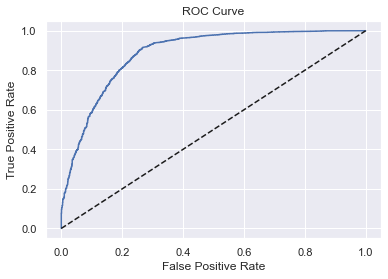

In [65]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color= 'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')